## Import Packages

In [1]:
!nvidia-smi

Fri Nov 25 15:08:45 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 472.50       Driver Version: 472.50       CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
|  0%   45C    P8    14W / 320W |   8595MiB / 10240MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
import tensorflow.keras
from keras import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn import metrics
from keras.datasets import cifar10
from keras.utils import to_categorical,load_img,img_to_array
from keras.preprocessing.image import ImageDataGenerator
from tensorflow_addons.optimizers import AdamW,SGDW
from sklearn.metrics import f1_score,confusion_matrix,classification_report
#Convolution Neural Networks Filter Image
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution2D, MaxPooling2D, UpSampling2D
# Convolution Auto Encoder Filter Image
from keras.layers import Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D,Concatenate ,Conv2DTranspose,GlobalAveragePooling2D,add,ZeroPadding2D,concatenate
from keras import optimizers
from keras.models import Model
from keras import backend as K
from keras import regularizers
from keras.layers import Input,Layer
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D ,LeakyReLU,ReLU, Concatenate,Flatten,BatchNormalization,Dropout,ReLU,LeakyReLU,PReLU
from keras import optimizers
from keras.models import Model
import gc
from sklearn.metrics import f1_score,confusion_matrix,classification_report
import collections

## Load Dataset

In [3]:
data=np.load('/Users/User/303/1_eonseung/creator_camp/final_data/224_imbalanced_x_normalization_final.npy')
labels=np.load("/Users/User/303/1_eonseung/creator_camp/final_data/224_imbalanced_y_final.npy")

In [4]:
len(data)

12583

In [5]:
# def normalize_image(img):
#     img=img .astype('float32')
#     for i in range(len(img)):
#         img[i]= img[i]/ 255.0
#         img[i][:,:,0]-=0.485 #R
#         img[i][:,:,1]-=0.458 #G
#         img[i][:,:,2]-=0.408 #B
        
#         img[i][:,:,0]/=0.229 #R
#         img[i][:,:,1]/=0.224 #G
#         img[i][:,:,2]/=0.225 #B
#     return img

In [6]:
# data= normalize_image(data)

In [7]:
IMAGENET_DEFAULT_MEAN = (0.485, 0.456, 0.406)
IMAGENET_DEFAULT_VAR = (0.229 ** 2, 0.224 ** 2, 0.225 ** 2)
# final=[]
# augmentation_layer = tf.keras.Sequential([
#     tf.keras.layers.experimental.preprocessing.Rescaling(1./255),            
#     tf.keras.layers.experimental.preprocessing.Normalization(mean=IMAGENET_DEFAULT_MEAN, variance=IMAGENET_DEFAULT_VAR)    
#     ])

In [8]:
from collections import Counter
Counter(labels)

Counter({1: 1893,
         2: 124,
         3: 1509,
         4: 410,
         5: 410,
         6: 422,
         7: 700,
         8: 426,
         0: 196,
         9: 364,
         10: 700,
         11: 419,
         12: 454,
         13: 180,
         14: 200,
         15: 547,
         16: 631,
         17: 2214,
         18: 402,
         19: 382})

## Train Test Split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [10]:
y_train = to_categorical(y_train,20) #원핫 인코딩
y_test=to_categorical(y_test,20) #원핫 인코딩

In [11]:
y_train[0]
y_test[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

In [12]:
len(x_train)


8808

In [13]:
len(x_test)

3775

## Model : VGG16 + Residual

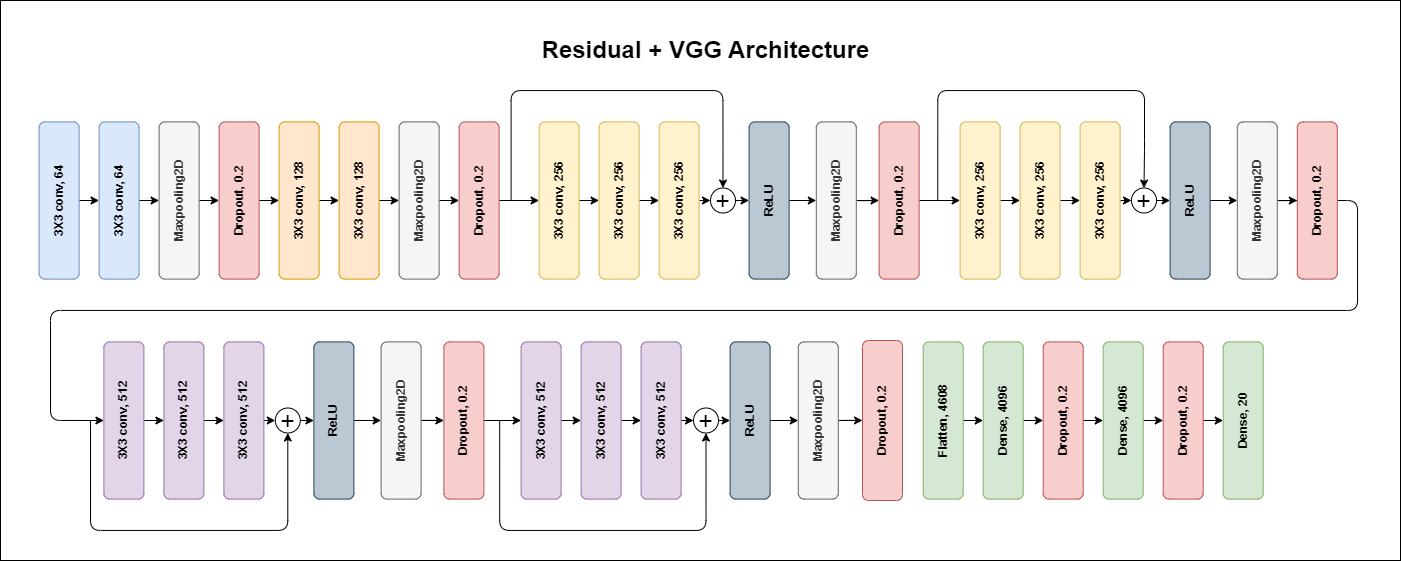

In [14]:
epochs = 100 #학습 반복 수
inChannel = 3 # 3채널 고정
x, y = 224, 224 # 바꿔서 사용
act=ReLU()
n_class = 20 #클래스 수
lr=0.0001 #learning rate- adam default
loss = 'categorical_crossentropy' #손실함수 
batch_size=32 #배치사이즈
opt=optimizers.Adam(learning_rate=lr)

In [15]:
# # 모델 여기다 붙여넣기c
# def model_fn():
#     input_img = Input(shape=(x,y,inChannel))
#     vgg = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input_img)            
#     vgg = tf.keras.layers.experimental.preprocessing.Normalization(mean=IMAGENET_DEFAULT_MEAN, variance=IMAGENET_DEFAULT_VAR)(vgg)   
#     vgg = Conv2D(64, (3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(64,(3,3),activation=act,padding='same')(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)

#     vgg = Conv2D(128,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(128,(3,3),activation=act,padding='same')(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)

#     vgg1 = Conv2D(256,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(256,(3,3),activation=act,padding='same')(vgg1)
#     vgg = Conv2D(256,(3,3),padding='same')(vgg)
#     vgg = add([vgg1,vgg])
#     vgg = ReLU()(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)

#     vgg2 = Conv2D(256,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(256,(3,3),activation=act,padding='same')(vgg2)
#     vgg = Conv2D(256,(3,3),padding='same')(vgg)
#     vgg = add([vgg2,vgg])
#     vgg = ReLU()(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)

#     vgg3 = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg3)
#     vgg = Conv2D(512,(3,3),padding='same')(vgg)
#     vgg = add([vgg3,vgg])
#     vgg = ReLU()(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)

#     vgg3 = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg3)
#     vgg = Conv2D(512,(3,3),padding='same')(vgg)
#     vgg = add([vgg3,vgg])
#     vgg = ReLU()(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)

#     vgg = Flatten()(vgg)
#     vgg = Dense(4096,activation='relu')(vgg)
#     vgg = Dense(4096,activation='relu')(vgg)
#     vgg = Dense(n_class,activation='softmax')(vgg)

#     vgg16 = Model(input_img , vgg)
#     return vgg16

In [16]:
# # 모델 여기다 붙여넣기
# def model_fn():
#     input_img = Input(shape=(x,y,inChannel))
#     vgg = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(input_img)
#     vgg = tf.keras.layers.experimental.preprocessing.Normalization(mean=(0.485, 0.456, 0.406), 
#                                                                    variance= (0.229 ** 2, 0.224 ** 2, 0.225 ** 2))(vgg)
#     vgg = Conv2D(64, (3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(64,(3,3),activation=act,padding='same')(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)
#     vgg = Dropout(0.2)(vgg)

#     vgg = Conv2D(128,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(128,(3,3),activation=act,padding='same')(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)
#     vgg = Dropout(0.2)(vgg)

#     vgg1 = Conv2D(256,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(256,(3,3),activation=act,padding='same')(vgg1)
#     vgg = Conv2D(256,(3,3),padding='same')(vgg)
#     vgg = add([vgg1,vgg])
#     vgg = ReLU()(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)
#     vgg = Dropout(0.2)(vgg)

#     vgg2 = Conv2D(256,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(256,(3,3),activation=act,padding='same')(vgg2)
#     vgg = Conv2D(256,(3,3),padding='same')(vgg)
#     vgg = add([vgg2,vgg])
#     vgg = ReLU()(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)
#     vgg = Dropout(0.2)(vgg)

#     vgg3 = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg3)
#     vgg = Conv2D(512,(3,3),padding='same')(vgg)
#     vgg = add([vgg3,vgg])
#     vgg = ReLU()(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)
#     vgg = Dropout(0.2)(vgg)

#     vgg3 = Conv2D(512,(3,3),activation=act,padding='same')(vgg)
#     vgg = Conv2D(512,(3,3),activation=act,padding='same')(vgg3)
#     vgg = Conv2D(512,(3,3),padding='same')(vgg)
#     vgg = add([vgg3,vgg])
#     vgg = ReLU()(vgg)
#     vgg = MaxPooling2D(pool_size=(2,2))(vgg)
#     vgg = Dropout(0.2)(vgg)

#     vgg = Flatten()(vgg)
#     vgg = Dense(4096,activation='relu')(vgg)
#     vgg = Dropout(0.2)(vgg)
#     vgg = Dense(4096,activation='relu')(vgg)
#     vgg = Dropout(0.2)(vgg)
#     vgg = Dense(n_class,activation='softmax')(vgg)

#     vgg16 = Model(input_img , vgg)
#     return vgg16

In [17]:
# 모델 여기다 붙여넣기
def model_fn():
    input_img = Input(shape=(x,y,inChannel))
    vgg = Conv2D(64, (3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(input_img)
    vgg = Conv2D(64,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg = Conv2D(128,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(128,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg1 = Conv2D(256,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(256,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg1)
    vgg = Conv2D(256,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = add([vgg1,vgg])
    vgg = ReLU()(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg2 = Conv2D(256,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(256,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg2)
    vgg = Conv2D(256,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = add([vgg2,vgg])
    vgg = ReLU()(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg3 = Conv2D(512,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg3)
    vgg = Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = add([vgg3,vgg])
    vgg = ReLU()(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg3 = Conv2D(512,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = Conv2D(512,(3,3),activation=act,padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg3)
    vgg = Conv2D(512,(3,3),padding='same',kernel_regularizer=regularizers.l2(0.001))(vgg)
    vgg = add([vgg3,vgg])
    vgg = ReLU()(vgg)
    vgg = MaxPooling2D(pool_size=(2,2))(vgg)
    vgg = Dropout(0.2)(vgg)

    vgg = Flatten()(vgg)
    vgg = Dense(4096,activation='relu')(vgg)
    vgg = Dropout(0.2)(vgg)
    vgg = Dense(4096,activation='relu')(vgg)
    vgg = Dropout(0.2)(vgg)
    vgg = Dense(n_class,activation='softmax')(vgg)

    vgg16 = Model(input_img , vgg)
    return vgg16

## Summary

In [18]:
model= model_fn()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 224, 224, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 3, 3, 512)   0           ['re_lu_4[0][0]']                
                                                                                                  
 dropout_5 (Dropout)            (None, 3, 3, 512)    0           ['max_pooling2d_5[0][0]']        
                                                                                                  
 flatten (Flatten)              (None, 4608)         0           ['dropout_5[0][0]']              
                                                                                                  
 dense (Dense)                  (None, 4096)         18878464    ['flatten[0][0]']                
                                                                                                  
 dropout_6 (Dropout)            (None, 4096)         0           ['dense[0][0]']                  
          

## F1-Score / Epoch 

In [19]:
#https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
def F1_score(y_true, y_pred):
    def recall(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

## Model Train

In [20]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,LearningRateScheduler,Callback

#경로 바꿔주기
filename = './checkpoint/실험용-{}-batch-{}-trial.ckpt'.format(epochs, batch_size)
checkpoint = ModelCheckpoint(filename,             
                             monitor='val_F1_score',
                             save_weights_only=True,
                             verbose=1,           
                             save_best_only=True,  
                             mode='max'         
                            )

earlystopping = EarlyStopping(monitor='val_F1_score',  
                              patience=6,         
                             mode='max'
                             )
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), mode='min',cooldown=0,
                              patience=10, min_lr=0.000000001)

In [21]:
trainGenerator = ImageDataGenerator( horizontal_flip=True, vertical_flip=True,
                    rotation_range = 10, shear_range=0.2)
trainiterator = trainGenerator.flow(x_train, y_train, batch_size=batch_size)

testGenerator = ImageDataGenerator()
testiterator = testGenerator.flow(x_test, y_test, batch_size=batch_size)

vgg16=model_fn()
vgg16.compile(loss=loss, optimizer=opt, metrics=['accuracy',F1_score],run_eagerly=True)

In [22]:
vgg_train = vgg16.fit(trainiterator,
                      epochs=epochs,
                      validation_data= testiterator, verbose=1,callbacks=[checkpoint,earlystopping,reduce_lr]
                                   )

Epoch 1/100
276/276 [==============================] - ETA: 0s - loss: 5.8568 - accuracy: 0.2131 - F1_score: 0.0119
Epoch 1: val_F1_score improved from -inf to 0.00000, saving model to ./checkpoint\실험용-100-batch-32-trial.ckpt
276/276 [==============================] - 77s 266ms/step - loss: 5.8568 - accuracy: 0.2131 - F1_score: 0.0119 - val_loss: 4.7352 - val_accuracy: 0.2164 - val_F1_score: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/100
276/276 [==============================] - ETA: 0s - loss: 4.0223 - accuracy: 0.2694 - F1_score: 0.0505
Epoch 2: val_F1_score improved from 0.00000 to 0.00616, saving model to ./checkpoint\실험용-100-batch-32-trial.ckpt
276/276 [==============================] - 73s 265ms/step - loss: 4.0223 - accuracy: 0.2694 - F1_score: 0.0505 - val_loss: 3.5975 - val_accuracy: 0.3219 - val_F1_score: 0.0062 - lr: 1.0000e-04
Epoch 3/100
276/276 [==============================] - ETA: 0s - loss: 3.1361 - accuracy: 0.3495 - F1_score: 0.1931
Epoch 3: val_F1_score improved from 0.0

Epoch 21/100
276/276 [==============================] - ETA: 0s - loss: 0.5848 - accuracy: 0.9263 - F1_score: 0.9273
Epoch 21: val_F1_score did not improve from 0.88452
276/276 [==============================] - 73s 263ms/step - loss: 0.5848 - accuracy: 0.9263 - F1_score: 0.9273 - val_loss: 0.8247 - val_accuracy: 0.8705 - val_F1_score: 0.8764 - lr: 3.1623e-05
Epoch 22/100
276/276 [==============================] - ETA: 0s - loss: 0.5280 - accuracy: 0.9437 - F1_score: 0.9422
Epoch 22: val_F1_score improved from 0.88452 to 0.89138, saving model to ./checkpoint\실험용-100-batch-32-trial.ckpt
276/276 [==============================] - 73s 265ms/step - loss: 0.5280 - accuracy: 0.9437 - F1_score: 0.9422 - val_loss: 0.8078 - val_accuracy: 0.8858 - val_F1_score: 0.8914 - lr: 1.0000e-05
Epoch 23/100
276/276 [==============================] - ETA: 0s - loss: 0.5111 - accuracy: 0.9454 - F1_score: 0.9457
Epoch 23: val_F1_score improved from 0.89138 to 0.89150, saving model to ./checkpoint\실험용-100-bat

276/276 [==============================] - 73s 264ms/step - loss: 0.4187 - accuracy: 0.9709 - F1_score: 0.9709 - val_loss: 0.8131 - val_accuracy: 0.9001 - val_F1_score: 0.9039 - lr: 3.1623e-06
Epoch 42/100
276/276 [==============================] - ETA: 0s - loss: 0.4097 - accuracy: 0.9749 - F1_score: 0.9756
Epoch 52: val_F1_score improved from 0.90756 to 0.90756, saving model to ./checkpoint\실험용-100-batch-32-trial.ckpt
276/276 [==============================] - 74s 266ms/step - loss: 0.4097 - accuracy: 0.9749 - F1_score: 0.9756 - val_loss: 0.8184 - val_accuracy: 0.9033 - val_F1_score: 0.9076 - lr: 3.1623e-07
Epoch 53/100
276/276 [==============================] - ETA: 0s - loss: 0.4042 - accuracy: 0.9759 - F1_score: 0.9767
Epoch 53: val_F1_score did not improve from 0.90756
276/276 [==============================] - 74s 266ms/step - loss: 0.4042 - accuracy: 0.9759 - F1_score: 0.9767 - val_loss: 0.8191 - val_accuracy: 0.9028 - val_F1_score: 0.9065 - lr: 3.1623e-07
Epoch 54/100
276/276 

In [23]:
#모델 불러올 땐 학습 코드 꼭 주석하고 load_weights활성화
vgg16.load_weights(filename)
#vgg16.load_weights("./checkpoint/10_31-10-batch-32-trial.ckpt")

In [24]:
pred = vgg16.predict(testiterator.x, verbose=1)

118/118 [==============================] - 6s 50ms/step


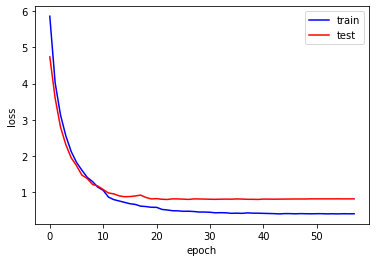

In [28]:
cae_loss = vgg_train.history['loss']
cae_val_loss = vgg_train.history['val_loss']
epochs = range(58)
plt.figure()
plt.plot(epochs, cae_loss, 'b', label="train")
plt.plot(epochs, cae_val_loss, 'r', label="test")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

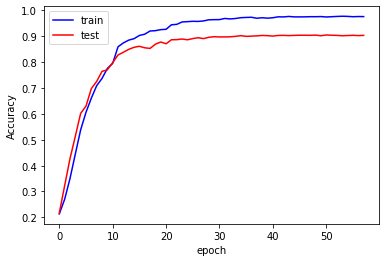

In [32]:
cae_loss = vgg_train.history['accuracy']
cae_val_loss = vgg_train.history['val_accuracy']
epochs = range(58)
plt.figure()
plt.plot(epochs, cae_loss, 'b', label="train")
plt.plot(epochs, cae_val_loss, 'r', label="test")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

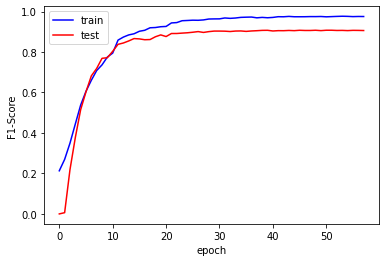

In [33]:
### cae_loss = vgg_train.history['F1_score']
cae_val_loss = vgg_train.history['val_F1_score']
epochs = range(58)
plt.figure()
plt.plot(epochs, cae_loss, 'b', label="train")
plt.plot(epochs, cae_val_loss, 'r', label="test")
plt.xlabel("epoch")
plt.ylabel("F1-Score")
plt.legend()
plt.show()

In [25]:
y_pred=[]
y_true=[]
for i in range(len(pred)):
    tmp1 = pred[i].argmax() 
    tmp2 = testiterator.y[i].argmax() 
    y_pred.append(tmp1)
    y_true.append(tmp2)

result_f1=f1_score(y_true, y_pred, average = None)

In [26]:
print("각 클래스별 F1-Score의 평균: {0} ".format(result_f1.mean()))
print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred, digits=4))

각 클래스별 F1-Score의 평균: 0.8574383848561651 
[[ 52   0   0   0   0   0   0   0   0   0   1   2   0   1   1   1   1   1
    0   0]
 [  0 558   0   3   1   0   2   0   0   0   0   0   0   0   0   1   0   0
    0   0]
 [  0   1  23   5   1   0   0   1   0   0   0   0   0   0   0   1   0   0
    1   0]
 [  0   0   4 460   0   0   0   1   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   2   2   0 115   0   0   0   2   0   0   0   1   0   0   2   1   1
    0   0]
 [  0  10   1   0   0  91   4   4   0   6   5   1   0   0   0   1   0   3
    1   1]
 [  0   2   0   1   3   1  85   7   2   4   1   2   3   1   1   2   2  10
    1   1]
 [  0   0   0   1   1   0   2 195   2   7   0   0   0   0   0   0   3   1
    1   0]
 [  1   2   0   3   5   0   1   3 103   0   1   2   7   0   0   0   3   5
    4   1]
 [  3   1   0   1   1   1   2   3   1  79   1   0   1   1   1   0   3   1
    0   3]
 [  0   0   0   0   0   1   0   0   4   1 177   2   2   1   2   2   4   1
    0   0]
 [  1   0   0   0   0   